In [1]:
### Intial Analysis File

In [2]:
import numpy as np
import pandas as pd
import scipy as sp
import statsmodels.api as sm
import statsmodels.graphics as smg
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime
from dateutil.parser import parse
from pandas import Series

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [3]:
attorney_info = pd.read_csv('attorney-info-10-11-2018.csv',index_col=0)
attorney_lic = pd.read_csv('attorney-licenses-10-11-2018.csv',index_col=0)
attorney_omatters = pd.read_csv('attorney-overdue-matters-10-11-2018.csv',index_col=0)
attorney_services = pd.read_csv('attorney-services-10-11-2018.csv',index_col=0)
attorney_zip = pd.read_csv('attorney-zipcodes-10-11-2018.csv',index_col=0)
matter_info = pd.read_csv('matter-info-10-11-2018.csv',index_col=0)
reporting_logs = pd.read_csv('reporting-logs-10-11-2018.csv',index_col=0)
survey = pd.read_csv('survey-responses-10-11-2018.csv',index_col=0)

In [4]:
attorney_info.head()

,Idiosyncratic Id,First Name,Last Name,Firm Name,Email,Phone Number,Address Line 1,Address Line 2,City,State,Zip,Bio,Admin Notes,Status,Ada Compliant?,Last Sign In At,Created At,Archived
Id,,,,,,,,,,,,,,,,,,
33,NaN,Adella,Deacon,"Sable Law Group, LLC",adella@sablelawgroup.com,3124690622,1132 S. Wabash Ave.,Suite 604,Chicago,Illinois,60605.0,Adella Deacon is an alumni member of the JEP a...,NaN,Live,Yes,04-30-2018,08-17-2017,False
40,NaN,Agostino,Filippone,"Chokshi Filippone Law, LLC",afilippone@law-cf.com,8473465565,208 S. Jefferson St.,Suite 204,Chicago,Illinois,60661.0,Agostino Filippone is a partner with Chokshi F...,NaN,Not live (Paused by the attorney),NaN,09-24-2018,08-17-2017,False
74,NaN,Alejandra,Vilchis,"Alejandra I. Vilchis, Attorney at Law",aiv@vilchislaw.com,8725291011,P.O. Box 6744,NaN,River Forest,Illinois,60305.0,Alejandra attended The John Marshall Law Schoo...,NaN,Live,NaN,06-25-2018,08-17-2017,False
17,NaN,Allison,Adams,NaN,amadams2@gmail.com,NaN,NaN,NaN,NaN,Illinois,NaN,NaN,NaN,"Not live (Missing phone number, address, city,...",NaN,07-11-2018,07-11-2018,False
51,NaN,Alyease,Jones,The Law Office of Alyease Jones,alyeasejonesesq@gmail.com,6304806580,208 S. Jefferson St.,Suite 204,Chicago,Illinois,60661.0,Alyease Jones was raised to understand the imp...,NaN,Not live (Paused by the attorney),NaN,06-12-2018,08-17-2017,False


In [5]:
attorney_lic.head()

,Idiosyncratic Id,First Name,Last Name,Firm Name,Email,State,Year
Id,,,,,,,
2,NaN,Calli Leigh,Burnett,"Burnett Law, LLC",burnettlaw.calli@gmail.com,Illinois,2015
4,NaN,Andrea,Karle,"Karle Law, LLC",andreakarle@karlelegal.com,Illinois,2016
5,NaN,Brittany,Howard,The Brittany L. Howard Law Office,brittany@blhlawoffice.com,Illinois,2016
7,NaN,Jennifer,Rosser,Rosser Law,jennifer@rosserlawchicago.com,Illinois,2016
8,NaN,Shymane,Robinson,Robinson Law LLC,info@realestatebusinesslawyer.com,Illinois,2017


In [6]:
attorney_omatters.head()

,Idiosyncratic Id,First Name,Last Name,Firm Name,Email,Matter Id,Overdue Since,Days Overdue
Id,,,,,,,,
26,NaN,Mark,Almanza,Almanza Law LLC,mark.almanza@almanzalaw.com,8066,10-05-2018,6 days
27,NaN,Rufus,Barner,"Rufus V. Barner, Attorney at Law",rvbarnerlaw@gmail.com,4034,05-25-2018,139 days
27,NaN,Rufus,Barner,"Rufus V. Barner, Attorney at Law",rvbarnerlaw@gmail.com,3250,06-25-2018,108 days
27,NaN,Rufus,Barner,"Rufus V. Barner, Attorney at Law",rvbarnerlaw@gmail.com,2942,06-25-2018,108 days
27,NaN,Rufus,Barner,"Rufus V. Barner, Attorney at Law",rvbarnerlaw@gmail.com,3043,06-25-2018,108 days


In [7]:
attorney_services.head()

,Idiosyncratic Id,First Name,Last Name,Firm Name,Email,Matter Type,Subtype,Modest Means
Id,,,,,,,,
33,NaN,Adella,Deacon,"Sable Law Group, LLC",adella@sablelawgroup.com,Business work,Small business dispute litigation,NaN
33,NaN,Adella,Deacon,"Sable Law Group, LLC",adella@sablelawgroup.com,House apartment,Real estate purchase or sale,NaN
33,NaN,Adella,Deacon,"Sable Law Group, LLC",adella@sablelawgroup.com,Probate,Probate other,NaN
33,NaN,Adella,Deacon,"Sable Law Group, LLC",adella@sablelawgroup.com,Other,Civil litigation,NaN
33,NaN,Adella,Deacon,"Sable Law Group, LLC",adella@sablelawgroup.com,Probate,Probate opened,NaN


In [49]:
matter_info['Matter Type'].unique()

array(['Business work', 'Probate', 'Family matrimonial',
       'Estate planning', 'House apartment', 'Crime traffic tickets',
       'Money debt', 'Immigration citizenship', 'Other'], dtype=object)

Subtype
Adoptions                           1.155556
Child support                      11.822222
Dcfs defense                        1.777778
Divorce                            32.533333
Family matrimonial other            8.622222
Guardianship                        2.755556
Guardianship of a child             0.711111
Guardianship of an adult            2.755556
Mediation collaborative divorce     0.266667
Order of protection                 6.133333
Parentage custody                  31.466667
Name: Client First Name, dtype: float64


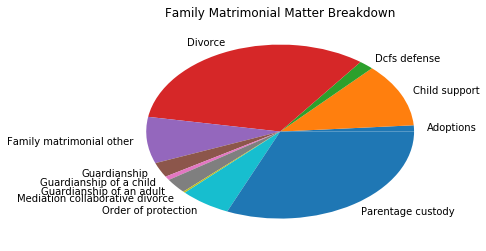

In [57]:
## Family Matters Breakdown
family_matters = matter_info[matter_info['Matter Type'] == 'Family matrimonial']
fm = family_matters.groupby(['Subtype'])
total = fm.Subtype.count().sum()
percent_fm = fm['Client First Name'].count()/total*100
print(percent_fm)
percent_fm.plot.pie(title='Family Matrimonial Matter Breakdown',label='')

Subtype
Business work other                                27.659574
Copyrights trademarks                               3.191489
Employment                                         12.765957
Employment agreements and compensation employee     4.255319
Employment agreements and compensation employer     2.127660
Employment discrimination employee                  2.127660
Nonprofit law                                       3.723404
Small business dispute litigation                  28.723404
Small business law                                 13.829787
Workers compensation                                1.063830
Name: Client First Name, dtype: float64


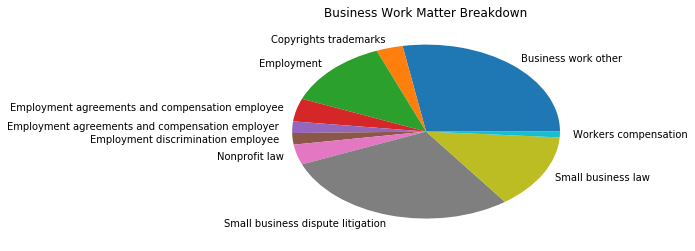

In [58]:
## Business Work Breakdown
bizwork = matter_info[matter_info['Matter Type'] == 'Business work']
bw = bizwork.groupby(['Subtype'])
total = bw.Subtype.count().sum()
percent_bw = bw['Client First Name'].count()/total*100
print(percent_bw)
percent_bw.plot.pie(title='Business Work Matter Breakdown',label='')

Subtype
General                  44.696970
Guardianships probate    11.363636
Probate opened           16.666667
Probate other            18.939394
Small estate issues       8.333333
Name: Client First Name, dtype: float64


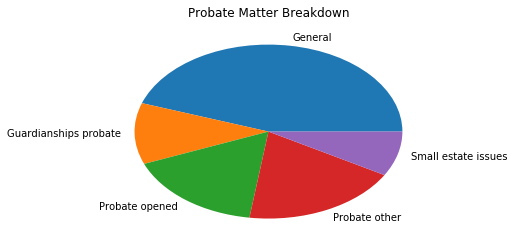

In [59]:
## Probate Breakdown
probate = matter_info[matter_info['Matter Type'] == 'Probate']
p = probate.groupby(['Subtype'])
total = p.Subtype.count().sum()
percent_p = p['Client First Name'].count()/total*100
print(percent_p)
percent_p.plot.pie(title='Probate Matter Breakdown',label='')

Subtype
House apartment other           17.994859
Housing discrimination           2.313625
Landlord help evictions         11.311054
Landlord help others             6.940874
Mortgage foreclosure defense     8.483290
Property tax appeal              0.257069
Real estate purchase or sale     3.341902
Tenant help evictions           22.879177
Tenant help others              26.478149
Name: Client First Name, dtype: float64


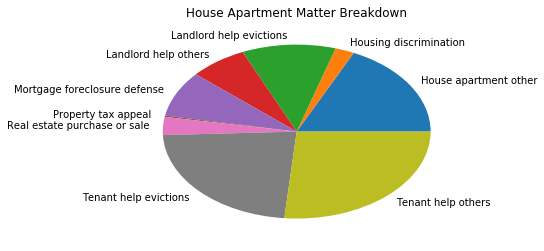

In [61]:
## House apartment Breakdown
house_apartment = matter_info[matter_info['Matter Type'] == 'House apartment']
ha = house_apartment.groupby(['Subtype'])
total = ha.Subtype.count().sum()
percent_ha = ha['Client First Name'].count()/total*100
print(percent_ha)
percent_ha.plot.pie(title='House Apartment Matter Breakdown',label='')

Subtype
Crime traffic tickets other              11.870504
Criminal felonies                        21.223022
Criminal misdemeanors                    20.143885
Criminal record                          24.460432
Drivers license suspension revocation     7.913669
Dui                                       4.676259
Ordinance violations fines                2.877698
Traffic tickets                           6.834532
Name: Client First Name, dtype: float64


278

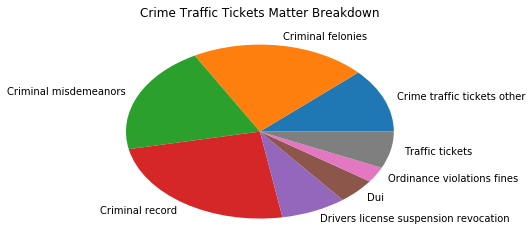

In [69]:
## Crime traffic tickets Breakdown
cttb = matter_info[matter_info['Matter Type'] == 'Crime traffic tickets']
ctt = cttb.groupby(['Subtype'])
total = ctt.Subtype.count().sum()
percent_ctt = ctt['Client First Name'].count()/total*100
print(percent_ctt)
percent_ctt.plot.pie(title='Crime Traffic Tickets Matter Breakdown',label='')

Subtype
Estate planning other    40.425532
Power of attorney        10.638298
Trusts                    8.510638
Wills                    40.425532
Name: Client First Name, dtype: float64


47

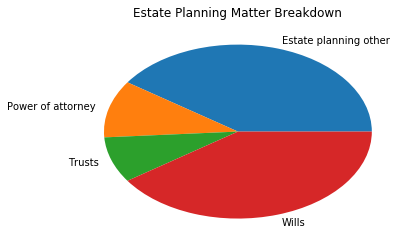

In [68]:
## Estate planning Breakdown
estate_planning = matter_info[matter_info['Matter Type'] == 'Estate planning']
ep = estate_planning.groupby(['Subtype'])
total = ep.Subtype.count().sum()
percent_ep = ep['Client First Name'].count()/total*100
print(percent_ep)
percent_ep.plot.pie(title='Estate Planning Matter Breakdown',label='')

Subtype
Chapter 13 bankruptcy       3.980100
Chapter 7 bankruptcy        8.457711
Collections defense         8.955224
Credit reporting errors     1.492537
Debt collections           21.393035
Debt relief bankruptcy     17.412935
Foreclosure defense         4.477612
Money debt other           29.850746
Tax                         1.990050
Tax dor                     0.497512
Tax irs                     1.492537
Name: Client First Name, dtype: float64


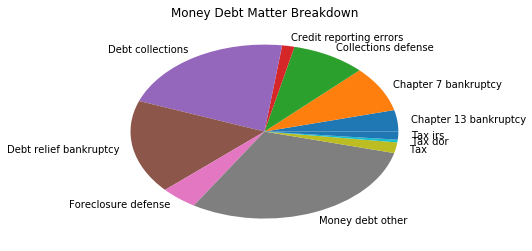

In [70]:
## Money debt Breakdown
debt = matter_info[matter_info['Matter Type'] == 'Money debt']
md = debt.groupby(['Subtype'])
total = md.Subtype.count().sum()
percent_md = md['Client First Name'].count()/total*100
print(percent_md)
percent_md.plot.pie(title='Money Debt Matter Breakdown',label='')

Subtype
Asylum                           15.384615
Family based applications        26.923077
Immigration citizenship other    38.461538
Naturalization                    3.846154
Student visas                     7.692308
U visas vawa                      7.692308
Name: Client First Name, dtype: float64


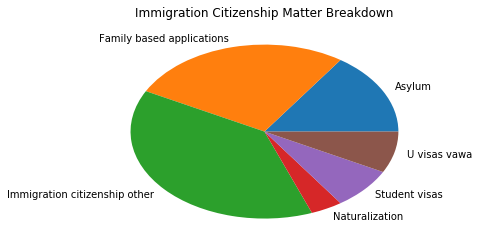

In [71]:
## Immigration citizenship Breakdown
cit = matter_info[matter_info['Matter Type'] == 'Immigration citizenship']
ic = cit.groupby(['Subtype'])
total = ic.Subtype.count().sum()
percent_ic = ic['Client First Name'].count()/total*100
print(percent_ic)
percent_ic.plot.pie(title='Immigration Citizenship Matter Breakdown',label='')

Subtype
Civil litigation              52.141058
Education law                  0.755668
Other other                   34.005038
Personal injury defense        4.282116
School discipline              1.007557
Social security disability     7.808564
Name: Client First Name, dtype: float64


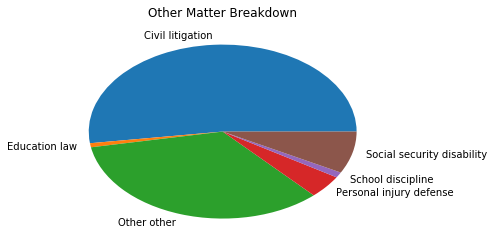

In [73]:
## Other Breakdown
other = matter_info[matter_info['Matter Type'] == 'Other']
o = other.groupby(['Subtype'])
total = o.Subtype.count().sum()
percent_o = o['Client First Name'].count()/total*100
print(percent_o)
percent_o.plot.pie(title='Other Matter Breakdown',label='')